# Is San Diego getting hotter?


#### I've lived in San Diego all my life, and it feels like San Diego is getting warmer. Global warming is definitely increasing the average temperature around the globe, but localized areas may differ in temperature change. To investigate whether the San Diego region is getting hotter or I'm becoming less tolerant, I've collected historical temperature data going back to 1980 from the National Climatic Data Center (https://www.ncdc.noaa.gov/ ). 

#### We begin by reading in the CSV files as pandas dataframes and deleting the columns we won't be using. Additionally, the dates are read in as datetime objects for easier parsing.

In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df10_17=pd.read_csv('2010-2017.csv',parse_dates=['DATE'])
df02_09=pd.read_csv('2002-2009.csv',parse_dates=['DATE'])
df95_01=pd.read_csv('1995-2001.csv',parse_dates=['DATE'])
df87_94=pd.read_csv('1987-1994.csv',parse_dates=['DATE'])
df80_86=pd.read_csv('1980-1986.csv',parse_dates=['DATE'])
df10_17.drop(['STATION','ELEVATION'],axis=1,inplace=True)
df02_09.drop('STATION',axis=1,inplace=True)
df95_01.drop('STATION',axis=1,inplace=True)
df87_94.drop('STATION',axis=1,inplace=True)
df80_86.drop('STATION',axis=1,inplace=True)

In [148]:
df10_17.head()

,STATION_NAME,LATITUDE,LONGITUDE,DATE,TMAX,TMIN
0,NORTH ISLAND NAS CA US,32.7,-117.2,2010-01-01,73,49
1,NORTH ISLAND NAS CA US,32.7,-117.2,2010-01-02,78,51
2,NORTH ISLAND NAS CA US,32.7,-117.2,2010-01-03,81,50
3,NORTH ISLAND NAS CA US,32.7,-117.2,2010-01-04,79,51
4,NORTH ISLAND NAS CA US,32.7,-117.2,2010-01-05,77,48


#### The longitude and latitude of each station is stored as a seperate dataframe for later use.

In [301]:
lat_lon=df10_17.loc[:,['STATION_NAME','LATITUDE','LONGITUDE']].drop_duplicates()

In [150]:
lat_lon.head()

,STATION_NAME,LATITUDE,LONGITUDE
0,NORTH ISLAND NAS CA US,32.7,-117.2
2717,GOOSE VALLEY CALIFORNIA CA US,33.0736,-116.8458
5430,SAN DIEGO MIRAMAR NAS CA US,32.86667,-117.13333
8059,SAN DIEGO SEAWORLD CA US,32.7672,-117.2258
9877,EL CAJON CA US,32.8138,-116.975


In [151]:
lat_lon=lat_lon.set_index('STATION_NAME')
df10_17.drop(['LATITUDE','LONGITUDE'],inplace=True,axis=1)

In [152]:
lat_lon.head()

,LATITUDE,LONGITUDE
STATION_NAME,,
NORTH ISLAND NAS CA US,32.7,-117.2
GOOSE VALLEY CALIFORNIA CA US,33.0736,-116.8458
SAN DIEGO MIRAMAR NAS CA US,32.86667,-117.13333
SAN DIEGO SEAWORLD CA US,32.7672,-117.2258
EL CAJON CA US,32.8138,-116.975


#### The temperature data is appended into one dataframe, and a list of unique station names is created.

In [153]:
df=df10_17.append([df02_09,df95_01,df87_94,df80_86])
stations=df.STATION_NAME.unique()
print(df.head())


             STATION_NAME       DATE  TMAX  TMIN
0  NORTH ISLAND NAS CA US 2010-01-01    73    49
1  NORTH ISLAND NAS CA US 2010-01-02    78    51
2  NORTH ISLAND NAS CA US 2010-01-03    81    50
3  NORTH ISLAND NAS CA US 2010-01-04    79    51
4  NORTH ISLAND NAS CA US 2010-01-05    77    48


#### It is immediately apparent that not all of the stations have temperature data over the entire time period. A dataframe is constructed consisting of data only from stations that have full time data for 2016. This will be used for geographical plotting later on.

In [154]:
stations_2016=[]
end_2016=pd.to_datetime('2016-12-31')
begin_2016=pd.to_datetime('2016-01-01')
for station in stations:
    if df.loc[df.STATION_NAME==station].DATE.max()>=end_2016 and df.loc[df.STATION_NAME==station].DATE.min()<=begin_2016:
        stations_2016.append(station)


#### The temperature dataframe is given a multindex structure using the dates and station names.

In [155]:
df.set_index(['STATION_NAME','DATE'],inplace=True)
df.sort_index(inplace=True)
print(df.head())
print(df.describe())

                         TMAX  TMIN
STATION_NAME DATE                  
ALPINE CA US 1980-01-01    75    50
             1980-01-02    77    47
             1980-01-03    72    45
             1980-01-05    72    45
             1980-01-06    67    34
                TMAX           TMIN
count  205554.000000  205554.000000
mean       46.177292     -17.807452
std       534.914963     839.287655
min     -9999.000000   -9999.000000
25%        67.000000      46.000000
50%        74.000000      53.000000
75%        82.000000      60.000000
max       130.000000     103.000000


#### The summary statistics above indicate that the value '-9999' has been inserted into the data, possibly to represent malfunctioning temperature sensors. These will need to be removed and some form of imputaion will be applied. 

#### First, we plot the data to get a sense of where we are missing data.

/home/cooler/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


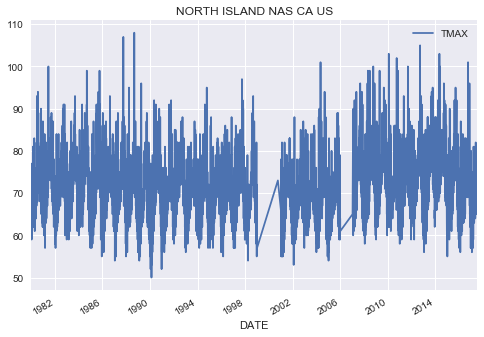

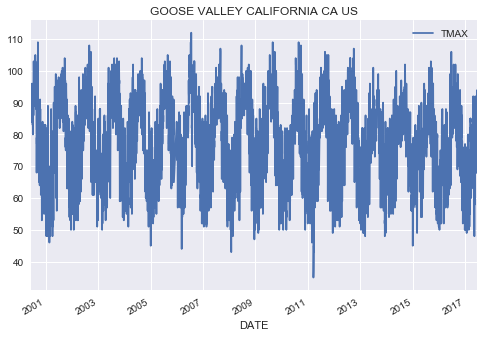

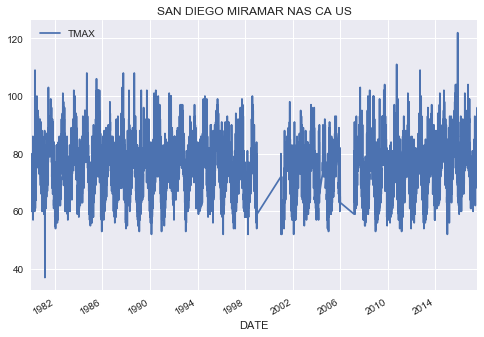

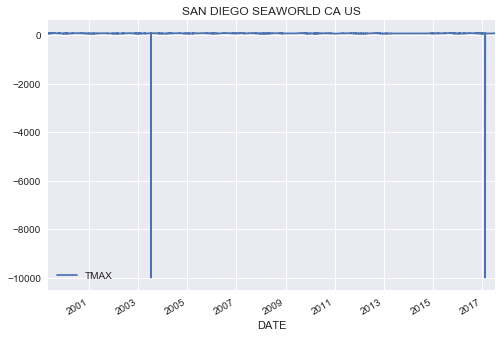

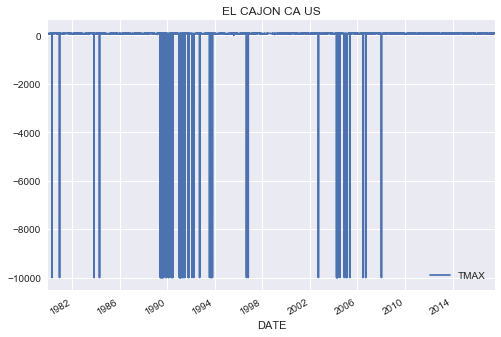

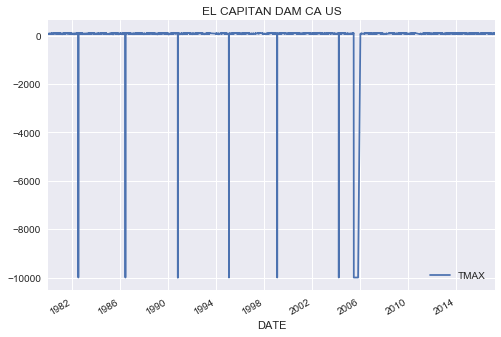

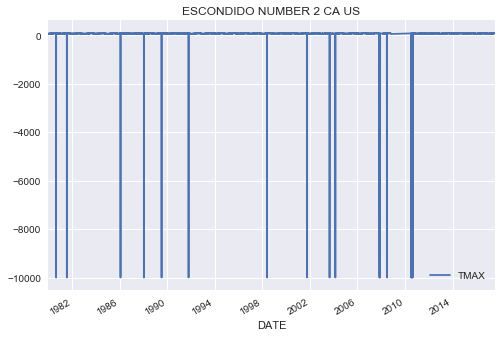

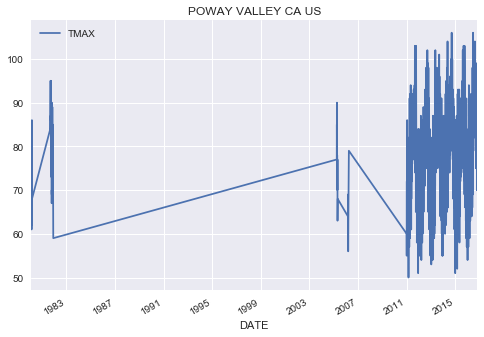

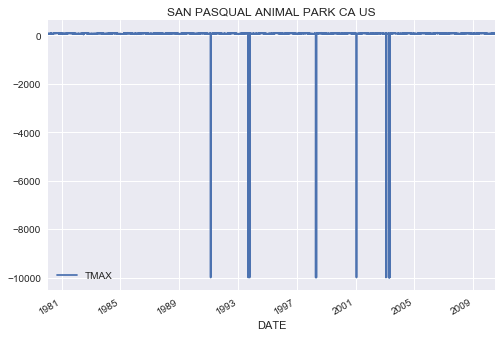

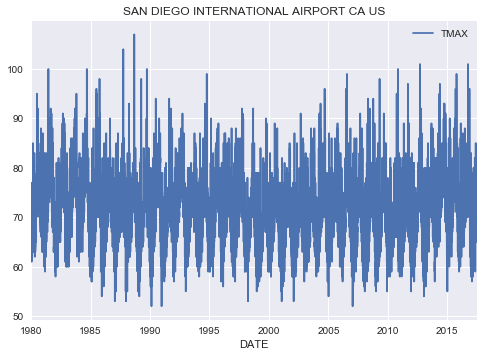

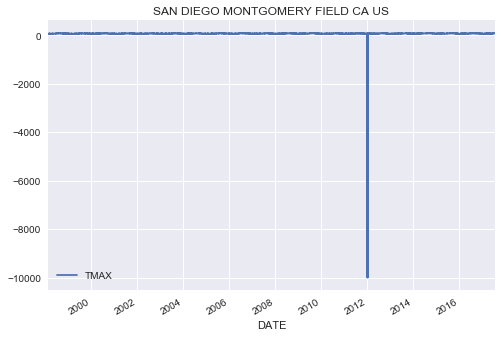

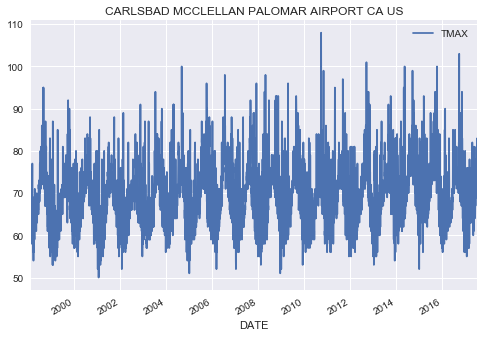

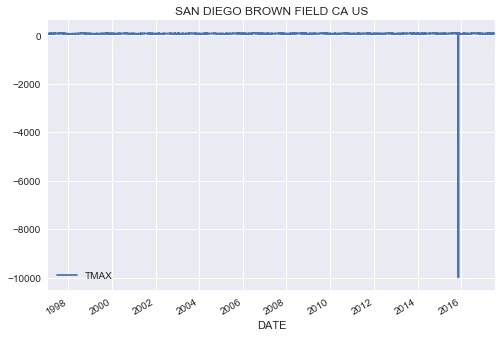

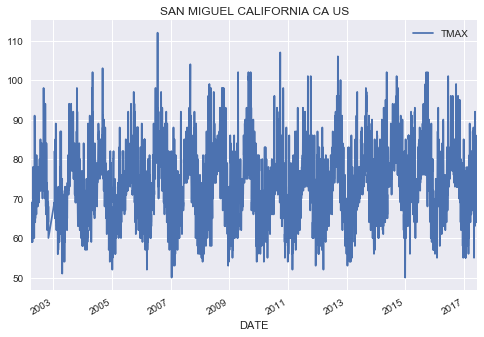

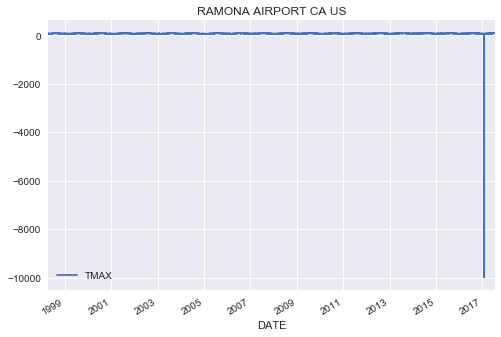

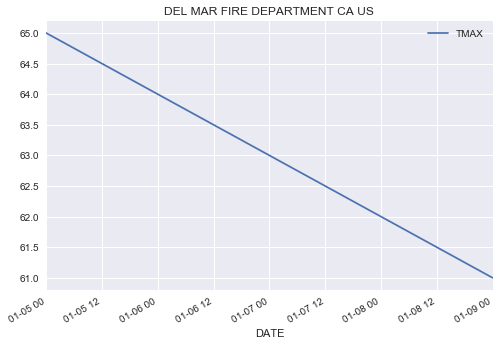

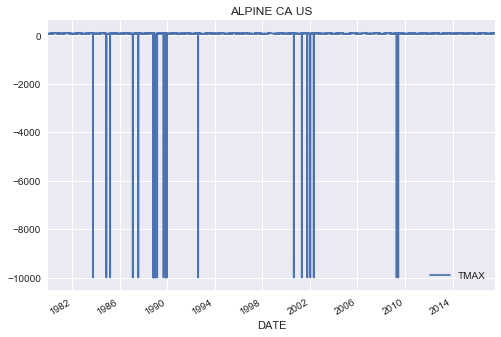

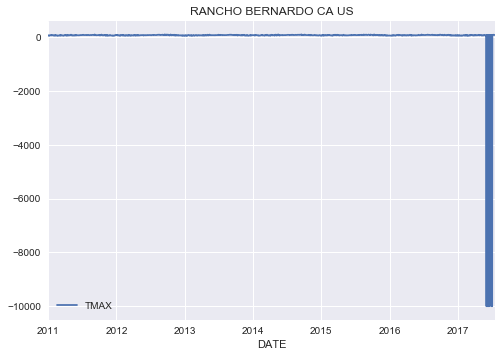

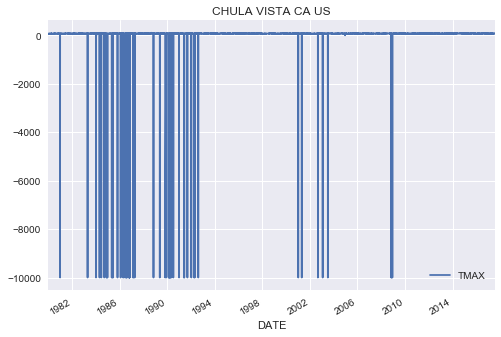

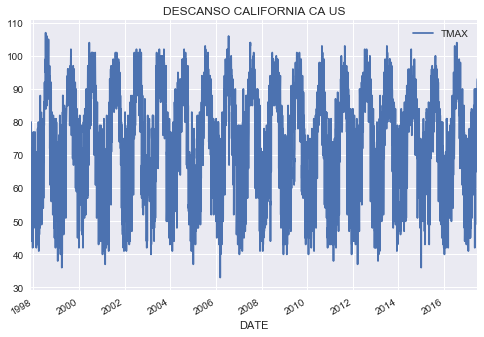

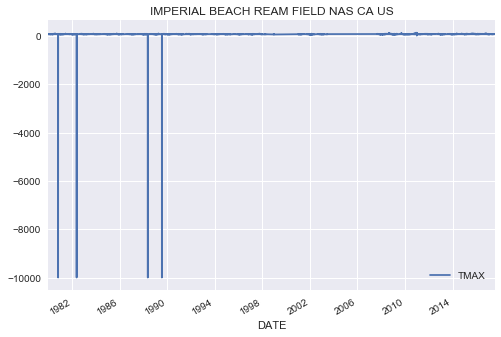

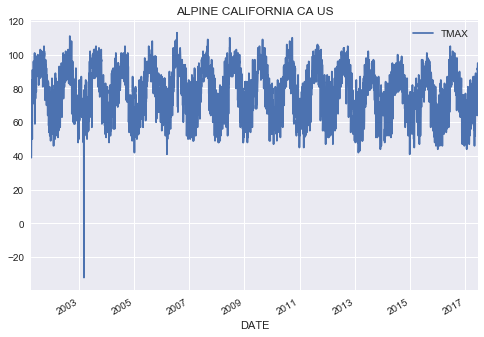

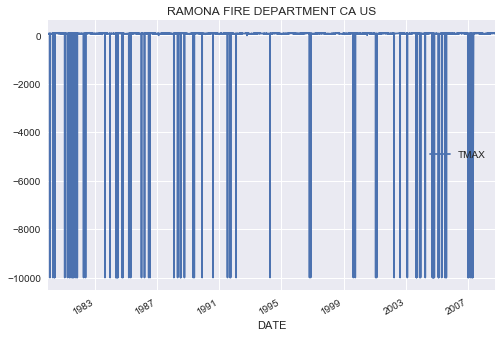

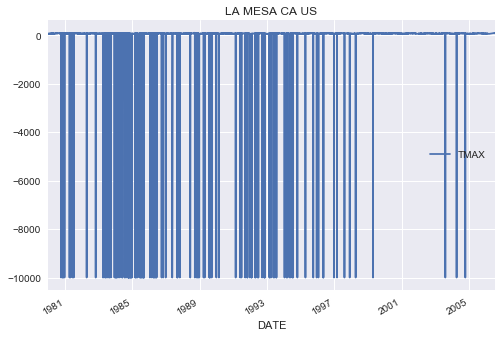

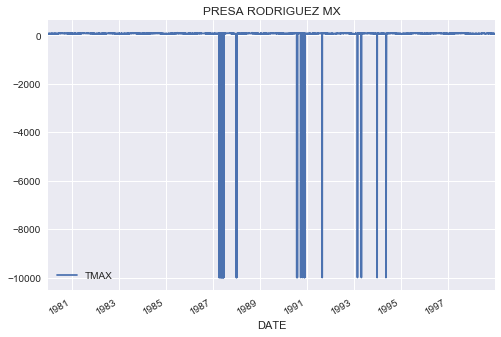

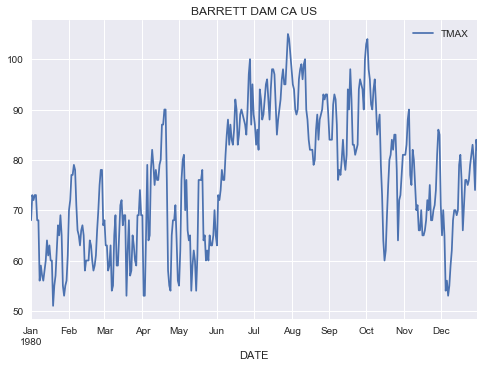

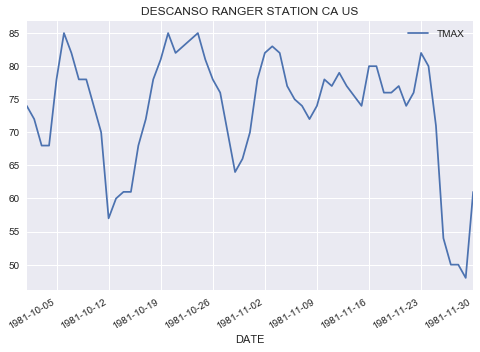

In [156]:
for station in stations:
    df.loc[station][['TMAX']].plot()
    plt.title(station)
plt.show()

#### Many stations are missing significant amounts of information, and won't be useful for a longitudinal study of the temperatures. 

#### A list is created consisting of stations that span a reasonable most of the desired time period.

In [159]:
min_date=df.loc['EL CAPITAN DAM CA US'].index.min()
max_date=df.loc['EL CAPITAN DAM CA US'].index.max()
all_dates=list(filter(lambda station: df.loc[station].index.min()<=min_date and df.loc[station].index.max()>=max_date, stations))
all_dates

['NORTH ISLAND NAS CA US',
 'SAN DIEGO MIRAMAR NAS CA US',
 'EL CAJON CA US',
 'EL CAPITAN DAM CA US',
 'ESCONDIDO NUMBER 2 CA US',
 'SAN DIEGO INTERNATIONAL AIRPORT CA US',
 'ALPINE CA US',
 'CHULA VISTA CA US',
 'IMPERIAL BEACH REAM FIELD NAS CA US']

#### There are almost no stations in the north county of San Diego that cover the desired time period. This must be taken into account when making our final conclusions.

#### Now it is time to impute the values of '-9999'. I considered an average of the day before and the day after the reading of '-9999', but there are some cases where the value occurs 2 or 3 times in a row. I will use the closest preceding date's temperature to replace the values.

In [160]:
df.replace(-9999,np.nan,inplace=True);
df.fillna(method='ffill',inplace=True)

#### A new dataframe is constructed consisting of the stations that cover the desired range of dates, and it is verfied that all instances of '-9999' have been removed.

In [302]:
temps=df.loc[all_dates]
print(temps.head())
print(temps['TMAX'].min())
print(temps['TMIN'].min())

                         TMAX  TMIN
STATION_NAME DATE                  
ALPINE CA US 1980-01-01  75.0  50.0
             1980-01-02  77.0  47.0
             1980-01-03  72.0  45.0
             1980-01-05  72.0  45.0
             1980-01-06  67.0  34.0
0.0
-26.0


#### Plotting temperature data for the new dataframe indicates that there are still substantial gaps in the data that need to be dealt with.

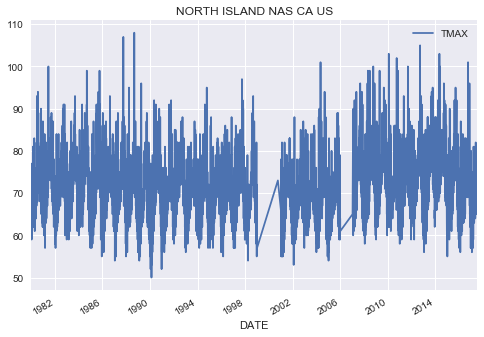

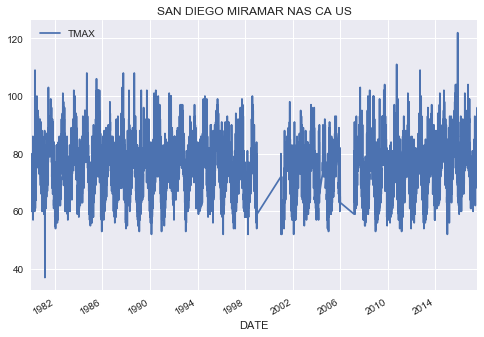

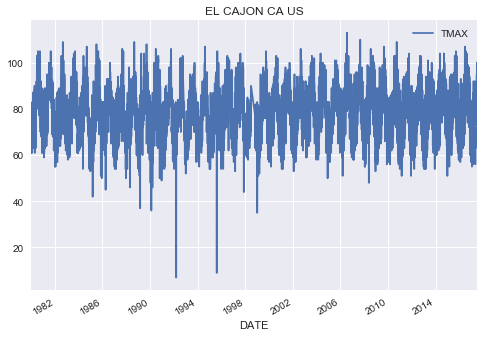

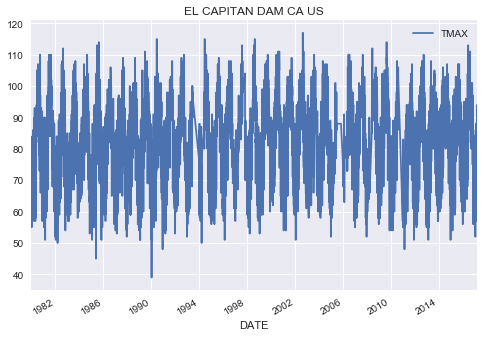

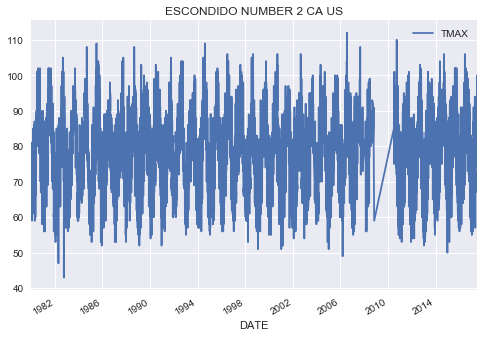

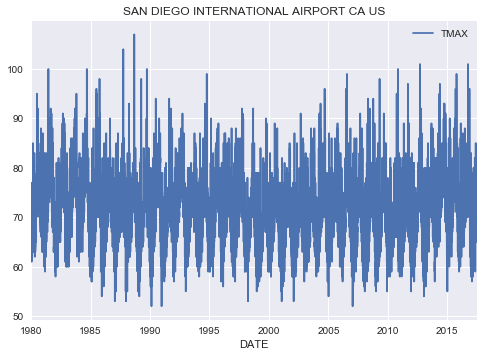

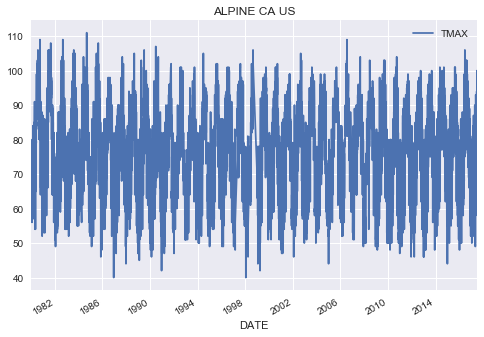

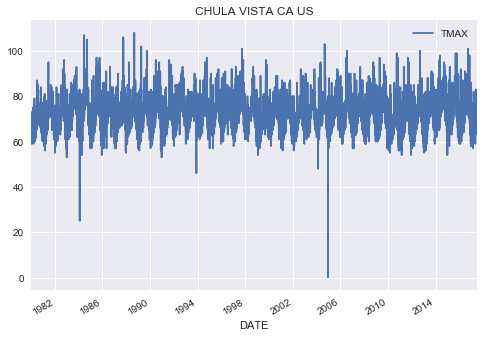

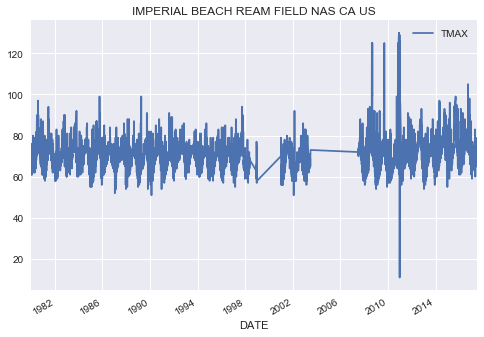

In [163]:
for station in all_dates:
    temps.loc[station][['TMAX']].plot()
    plt.title(station)
plt.show()

#### Groupby is used to create a dataframe of monthly averages, and the index is reset.

In [168]:
temps.reset_index(level=0,inplace=True)
month_avg=temps.groupby([temps.index.year,temps.index.month,temps.STATION_NAME]).mean()

In [169]:
month_avg.reset_index(level=2,inplace=True)
month_avg.index.names=['YEAR','MONTH']
month_avg.reset_index(level=1,inplace=True)
month_avg.head()

,MONTH,STATION_NAME,TMAX,TMIN
YEAR,,,,
1980,1,ALPINE CA US,63.566667,46.166667
1980,1,CHULA VISTA CA US,64.580645,51.193548
1980,1,EL CAJON CA US,68.096774,47.967742
1980,1,EL CAPITAN DAM CA US,67.225806,46.903226
1980,1,ESCONDIDO NUMBER 2 CA US,66.633333,45.466667


#### The most complete temperature data comes from the station located at the San Diego International Airport, which is located next to San Diego bay. We now examine the monthly average temperature data from this station, which should give a reasonable representation of coastal San Diego temperatures over the time period.

In [171]:
san_diego=month_avg.loc[month_avg.STATION_NAME=='SAN DIEGO INTERNATIONAL AIRPORT CA US']
print(san_diego.head())
san_diego.reset_index(inplace=True)

      MONTH                           STATION_NAME       TMAX       TMIN
YEAR                                                                    
1980      1  SAN DIEGO INTERNATIONAL AIRPORT CA US  67.258065  54.870968
1980      2  SAN DIEGO INTERNATIONAL AIRPORT CA US  70.689655  56.310345
1980      3  SAN DIEGO INTERNATIONAL AIRPORT CA US  68.161290  54.806452
1980      4  SAN DIEGO INTERNATIONAL AIRPORT CA US  70.233333  57.533333
1980      5  SAN DIEGO INTERNATIONAL AIRPORT CA US  67.548387  60.000000


#### The Seaborn package is used to plot regression lines on top of the average monthly temperature data over the time period. Note that that shaded area around the fitted lines denotes the 95% confidence region for the regression line.

#### The resulting regression lines do not indicate a clear trend in the monthly average temperatures, and most of the months have a very small negative slope, which indicates it is getting cooler! The excepton is for the months of October and November, which show a small positive slope for both the minimum and maximum temperatures.

#### It should be noted that these regression lines are best used for exploratory data analysis, as a more formal approach would look at the goodness of fit for each line.

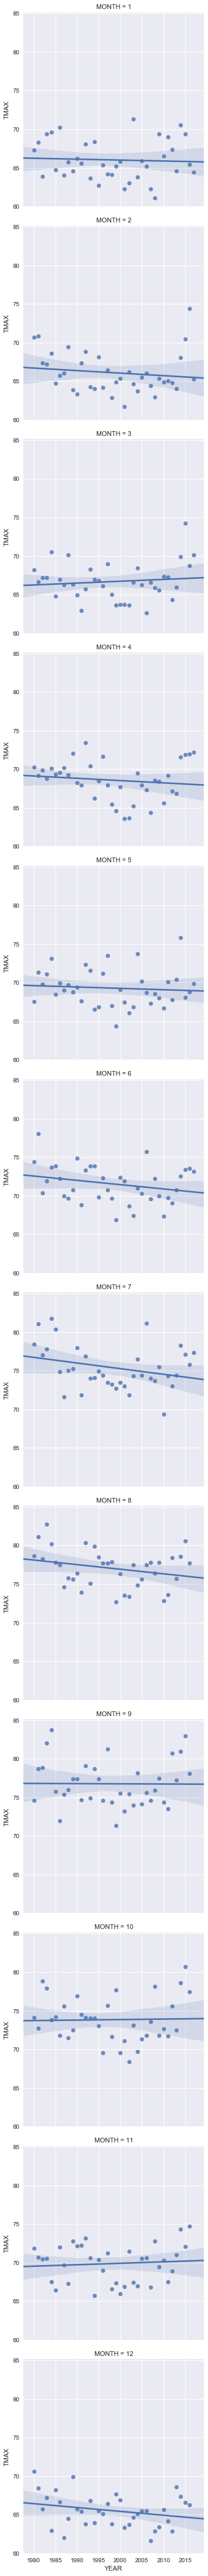

In [172]:
sns.lmplot(x='YEAR',y='TMAX',row='MONTH',data=san_diego)
plt.show()

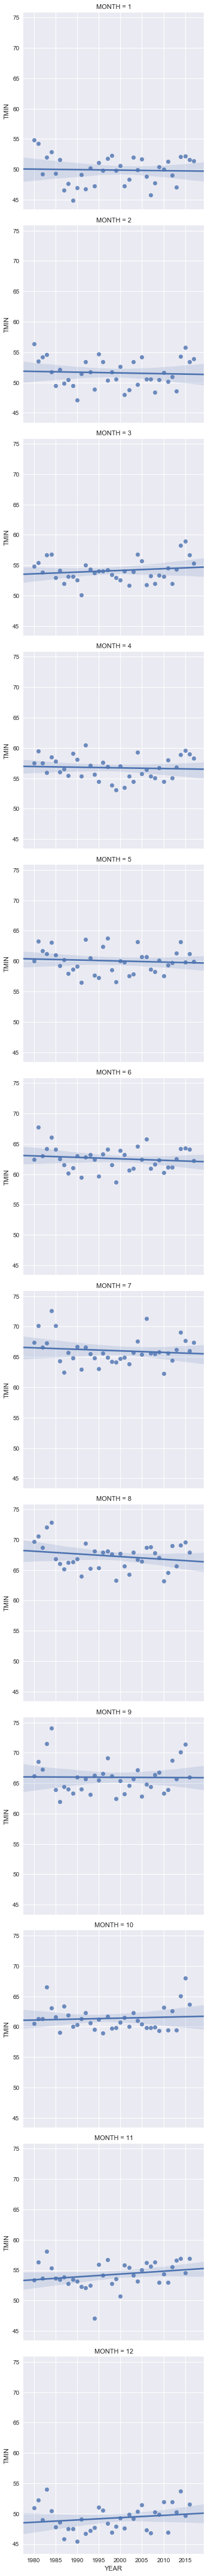

In [173]:
sns.lmplot(x='YEAR',y='TMIN',row='MONTH',data=san_diego)
plt.show()

#### Averages only tell part of the story. For instance, a particular average could come from a set of data points that all take the same value, but it could also come from a set of data points that contains only a couple of outliers that exert a large amount of influence on the mean.

#### The aspect of high temperatures that I dislike the most is when the night does not cool off. With this in mind, we now consider looking at the number of nights in a year that are above a certain temperature. 

In [312]:
sd_temps=df.loc['SAN DIEGO INTERNATIONAL AIRPORT CA US']
sd_temps=sd_temps.loc[:'2016-12-31',:]

,TMAX,TMIN
DATE,,
2016-12-27,69.0,46.0
2016-12-28,74.0,48.0
2016-12-29,83.0,51.0
2016-12-30,62.0,56.0
2016-12-31,60.0,52.0


In [177]:
lows=sd_temps.loc[sd_temps.TMIN>65].groupby(pd.TimeGrouper(freq='A')).count()[['TMIN']]
for i in range(66,73):
    lows=pd.merge(lows,sd_temps.loc[sd_temps.TMIN>i].groupby(pd.TimeGrouper(freq='A')).count()[['TMIN']],left_index=True,right_index=True,suffixes=('','_'+str(i)))
lows.rename(columns={'TMIN':'TMIN_65'},inplace=True)
lows.head()

,TMIN_65,TMIN_66,TMIN_67,TMIN_68,TMIN_69,TMIN_70,TMIN_71,TMIN_72
DATE,,,,,,,,
1980-12-31,78,62,48,33,26,14,8,4
1981-12-31,127,113,102,84,59,30,12,5
1982-12-31,76,64,53,41,21,11,4,2
1983-12-31,118,103,91,69,56,47,33,22
1984-12-31,125,113,108,103,93,81,71,60


In [308]:
from bokeh.charts import Line
from bokeh.io import show, output_notebook
output_notebook()

line = Line(lows, title='# of nights in a year above a given temperature')
line.legend.location='top_center'
show(line)

Loading BokehJS ...

#### The above plot begins to reveal a story in our data. There was a period of warm weather in the early 80's, and a more recent period of warm weather beginning around 2014. This largely explains the slopes of the regression lines in our previous Seaborn plots.

#### Next we look at the number of days in a given year above a specified temperature, and a similar picture emerges.

In [179]:
highs=sd_temps.loc[sd_temps.TMAX>80].groupby(pd.TimeGrouper(freq='A')).count()[['TMAX']]
for i in range(81,90):
    highs=pd.merge(highs,sd_temps.loc[sd_temps.TMAX>i].groupby(pd.TimeGrouper(freq='A')).count()[['TMAX']],left_index=True,right_index=True,suffixes=('','_'+str(i)))
highs.rename(columns={'TMAX':'TMAX_80'},inplace=True)
highs.head()

,TMAX_80,TMAX_81,TMAX_82,TMAX_83,TMAX_84,TMAX_85,TMAX_86,TMAX_87,TMAX_88,TMAX_89
DATE,,,,,,,,,,
1980-12-31,30,28,23,20,12,7,5,4,3,3
1981-12-31,47,41,31,20,15,11,10,8,6,5
1982-12-31,40,27,23,20,13,11,8,7,6,3
1983-12-31,58,51,46,39,27,19,16,9,6,6
1984-12-31,61,49,36,29,23,15,11,9,9,5


In [309]:
line = Line(highs, title='# of days in a year above a given temperature')
line.legend.location='top_center'
show(line)

#### Armed with these new insights it is clear that the choice of date range will have a dramatic effect on the conclusions that can be drawn from the data. To demonstrate this we truncate the data to begin at 1990, and then revisit the linear regression plots.

#### The result is regression lines with a positive slop indicating a warming trend, but this is merely a consequence of cherry picking the data. What is clear fro the previous plots is that there were two distinct periods of warming over the past 30 years. One of these periods was in the early 80's, and the other is happening right now.

In [181]:
sd_temps=sd_temps.loc['1990-01-01':,:]
sd_temps.head()

,TMAX,TMIN
DATE,,
1990-01-01,63.0,45.0
1990-01-02,58.0,51.0
1990-01-03,61.0,46.0
1990-01-04,64.0,42.0
1990-01-05,66.0,42.0


In [182]:
sd_avg=sd_temps.groupby([sd_temps.index.year,sd_temps.index.month]).mean()
sd_avg.index.names=['YEAR','MONTH']
sd_avg.reset_index(inplace=True)
sd_avg.head()

,YEAR,MONTH,TMAX,TMIN
0,1990,1,66.193548,47.000000
1,1990,2,63.285714,47.142857
2,1990,3,64.935484,52.548387
3,1990,4,68.266667,58.133333
4,1990,5,69.354839,59.096774


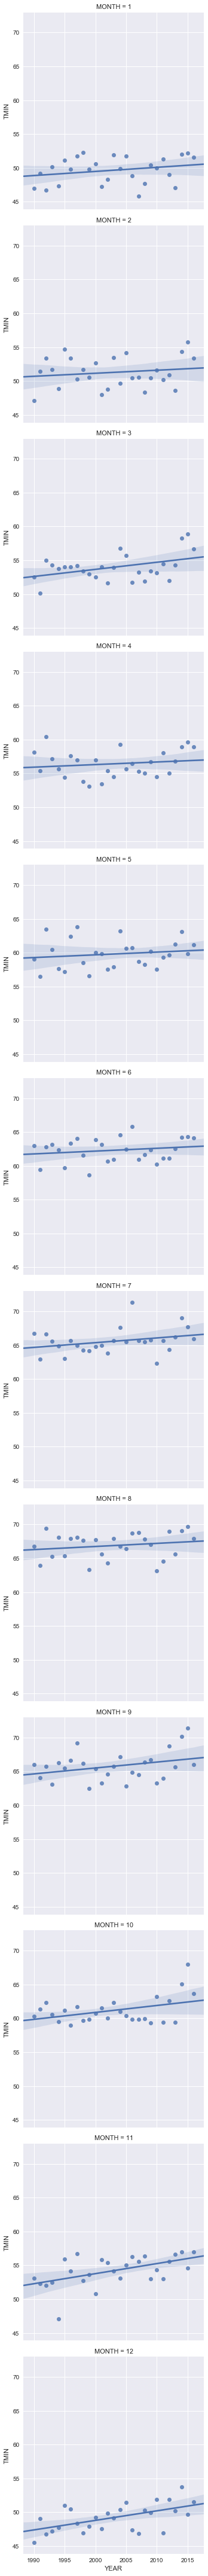

In [183]:
sns.lmplot(x='YEAR',y='TMIN',row='MONTH',data=sd_avg)
plt.show()

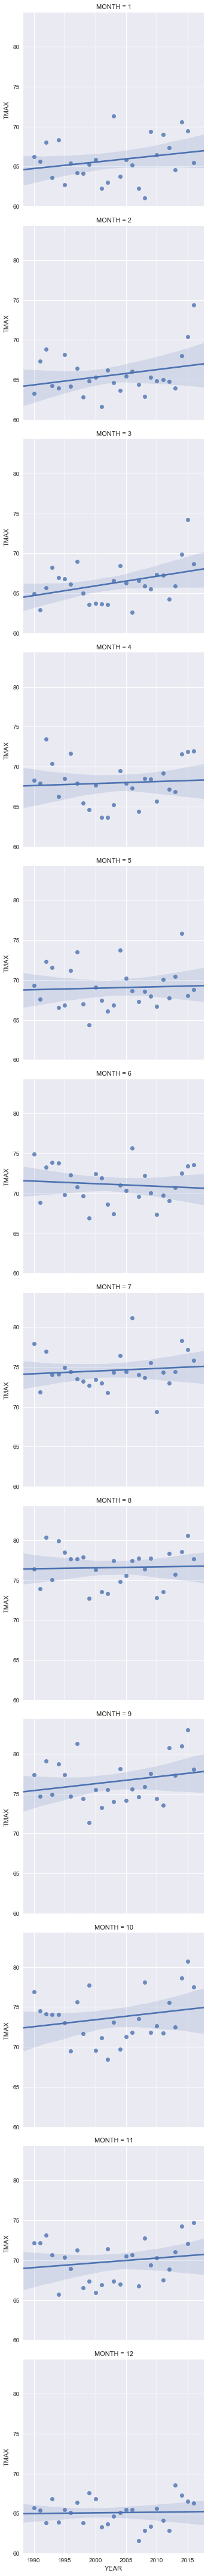

In [184]:
sns.lmplot(x='YEAR',y='TMAX',row='MONTH',data=sd_avg)
plt.show()

#### Now we focus on the year 2016, since it is both recent and most of the stations have complete data for this period. This will allow to ask whether certain regions of San Diego offer more favourable weather than other regions. We expect the coastal regins to be the most temperant, while inland regions will have more extreme temperatures.

In [212]:
lat_lon_2016=lat_lon.groupby(lat_lon.index).last().loc[stations_2016]
temps_2016=df.loc[idx[:,'2016-01-01':'2016-12-31'],:].loc[stations_2016]
temps_2016.reset_index(0,inplace=True)
print(lat_lon_2016)

                                          LATITUDE   LONGITUDE
STATION_NAME                                                  
NORTH ISLAND NAS CA US                        32.7      -117.2
GOOSE VALLEY CALIFORNIA CA US              33.0736   -116.8458
SAN DIEGO MIRAMAR NAS CA US               32.86667  -117.13333
SAN DIEGO SEAWORLD CA US                   32.7672   -117.2258
EL CAJON CA US                             32.8005    -116.928
EL CAPITAN DAM CA US                       32.8856   -116.8149
ESCONDIDO NUMBER 2 CA US                    33.121     -117.09
SAN DIEGO INTERNATIONAL AIRPORT CA US      32.7336   -117.1831
SAN DIEGO MONTGOMERY FIELD CA US          32.81583  -117.13944
CARLSBAD MCCLELLAN PALOMAR AIRPORT CA US  33.12806  -117.27944
SAN DIEGO BROWN FIELD CA US               32.57222  -116.97944
SAN MIGUEL CALIFORNIA CA US                 32.685   -116.9736
RAMONA AIRPORT CA US                       33.0375  -116.91583
ALPINE CA US                               32.8358   -1

In [226]:
avg_2016=temps_2016.groupby([temps_2016.index.year,temps_2016.index.month,temps_2016.STATION_NAME]).mean()
avg_2016.reset_index(2,inplace=True)
avg_2016.reset_index(0,inplace=True)
del avg_2016['DATE']
avg_2016.index.names=['MONTH']
avg_2016.head()

,STATION_NAME,TMAX,TMIN
MONTH,,,
1,ALPINE CA US,61.935484,40.645161
1,ALPINE CALIFORNIA CA US,60.387097,44.064516
1,CARLSBAD MCCLELLAN PALOMAR AIRPORT CA US,63.774194,49.000000
1,CHULA VISTA CA US,65.870968,49.483871
1,DESCANSO CALIFORNIA CA US,57.967742,36.903226


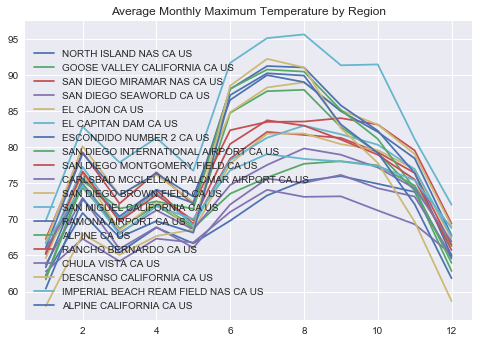

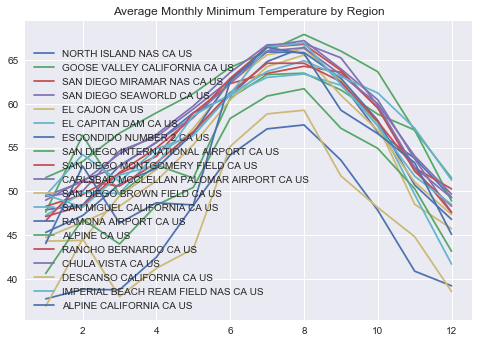

In [229]:
for station in stations_2016:
    plt.plot(avg_2016.loc[avg_2016.STATION_NAME==station][['TMAX']],label=station)
plt.legend()
plt.title('Average Maximum Temperature by Month and Region')
plt.show()
for station in stations_2016:
    plt.plot(avg_2016.loc[avg_2016.STATION_NAME==station][['TMIN']],label=station)
plt.legend()
plt.title('Average Minimum Temperature by Month and Region')
plt.show()

#### The above line plots indicate that there is a significant disparity in the average monthly minimum and maximum temperatures, but the plots are bit too messy to fully decipher.

#### A better alternative form of visualization may come from a geographical scatter plot of monthly average temperatures. For this we turn to the basmap package, and examine the average monthly minimum temperature by region during August. This is a month that can affect sleep, due to the consistently warmer nights.

http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_Imagery_World_2D/MapServer/export?bbox=-117.5565,32.5329,-116.0129,33.2938&bboxSR=4326&imageSR=4326&size=1500,739&dpi=96&format=png32&f=image


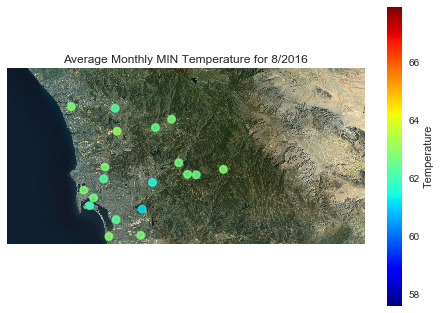

In [313]:
import matplotlib.cm
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap

m = Basemap(resolution='h',
            llcrnrlon=-117.5565,
            llcrnrlat= 32.5329,
            urcrnrlon=-116.0129,
            urcrnrlat=33.2938)

m.arcgisimage(service='ESRI_Imagery_World_2D', xpixels = 1500, verbose= True)
max_temp=avg_2016['TMAX'].max()
min_temp=avg_2016['TMIN'].min()
month=8
temp='TMIN'
col=plt.get_cmap('jet')
norm=avg_2016.loc[month,temp].apply(lambda x: 1-(max_temp-x)/(max_temp-min_temp))
m.scatter(lat_lon_2016['LONGITUDE'],
          lat_lon_2016['LATITUDE'],
          marker='o',
          color=col(norm),
          cmap=plt.cm.jet,
          alpha=.8,
          lw=2)

map = mpl.cm.ScalarMappable(cmap=mpl.cm.jet)
map.set_array(avg_2016.loc[month,temp])
c=plt.colorbar(map)
c.set_label('Temperature')
plt.title('Average '+temp[1:]+' Temperature for '+str(month)+'/2016')
plt.show()

#### The coolest nighttime temperatures are in a couple of inland San Diego regions, but not all of the inland regions have cool nights. The coolest nighttime coastal region appears to be Coronado. However, as noted earlier, much the data for north county San Diego coastal regions are not included in this dataset.

#### With our limited data the sweet spot between temperant weather and cooler nights appears to be Coronado.

#### Additional temperature data for the station at San Diego International Airport has been downloaded, with the date range going back to 1939. A longer time period should help identify any long-term trends. Next we read in this csv file and organize it into a single dataframe with the pre-existing dataframe.

In [357]:
sd_old=pd.read_csv('1939-1979_sd.csv',
        header=0,
        usecols=["DATE", "TMAX", "TMIN"],
        parse_dates=["DATE"])
print(sd_old.head())
print(sd_old.describe())

        DATE  TMAX  TMIN
0 1939-07-01  74.7  63.4
1 1939-08-01  77.3  64.7
2 1939-09-01  81.2  65.1
3 1939-10-01  77.6  57.3
4 1939-11-01  72.2  53.3
             TMAX        TMIN
count  483.000000  483.000000
mean    70.681366   56.090683
std      4.865906    6.617942
min     56.100000   39.500000
25%     67.000000   50.300000
50%     70.200000   55.900000
75%     74.800000   61.800000
max     82.600000   69.900000


In [358]:
sd_old['YEAR']=[d.year for d in sd_old.DATE]
sd_old['MONTH']=[d.month for d in sd_old.DATE]
sd_old.drop('DATE',axis=1,inplace=True)
sd_old.set_index(['YEAR','MONTH'],inplace=True)
sd_old.reset_index(1,inplace=True)
sd_old=sd_old.loc['1940':'1979']
sd_old.reset_index(inplace=True)
print(sd_old.head())
print(sd_old.tail())
print(sd_old.shape)

   YEAR  MONTH  TMAX  TMIN
0  1940      1  65.5  50.8
1  1940      2  66.0  49.8
2  1940      3  68.9  51.7
3  1940      4  70.4  54.7
4  1940      5  71.0  58.6
     YEAR  MONTH  TMAX  TMIN
472  1979      8  78.8  69.0
473  1979      9  82.6  69.9
474  1979     10  74.3  63.0
475  1979     11  71.4  53.3
476  1979     12  71.1  50.0
(477, 4)


In [360]:
san_diego.drop('STATION_NAME',axis=1,inplace=True)
sd_new=pd.concat([sd_old,san_diego])
print(sd_new.head())
print(sd_new.tail())
print(sd_new.shape)

   YEAR  MONTH  TMAX  TMIN
0  1940      1  65.5  50.8
1  1940      2  66.0  49.8
2  1940      3  68.9  51.7
3  1940      4  70.4  54.7
4  1940      5  71.0  58.6
     YEAR  MONTH       TMAX       TMIN
446  2017      3  70.096774  55.354839
447  2017      4  72.233333  58.266667
448  2017      5  69.838710  59.967742
449  2017      6  73.200000  62.233333
450  2017      7  77.307692  67.384615
(928, 4)


#### Plotting the average daily minimum temperature by month versus year for the extended time period of 1940-2017 shows a clear positive trend. Nighttime temperatures for each month have been getting warmer on average since 1940. 

#### Note that the 95% confidence intervals for the regression line (i.e. the shaded region around the line) are much tighter than in the previous regression plots. The trend of warming nighttime temperatures is clear.

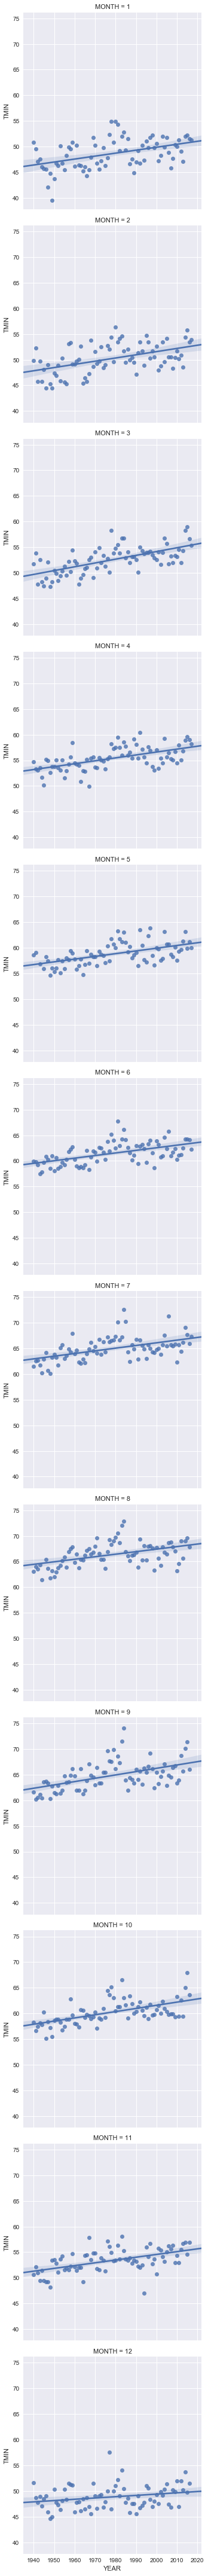

In [361]:
sns.lmplot(x='YEAR',y='TMIN',row='MONTH',data=sd_new)
plt.show()

#### A plot of the average daily maximum temperature for each month versus year shows a mixed story. Most of the months indicate a slight cooling trend for the maximum temperature. Note that the 95% confidence region is much bigger for these plots, indicating the relationship is not quite as strong as in the previous plots.

#### A plot of the number of days in a year where the temperature is above a certain level may offer more insight here. However, it can be said without doubt that the nighttime temperatures are getting warmer in San Diego, and my sense of local weather is supported by the data.

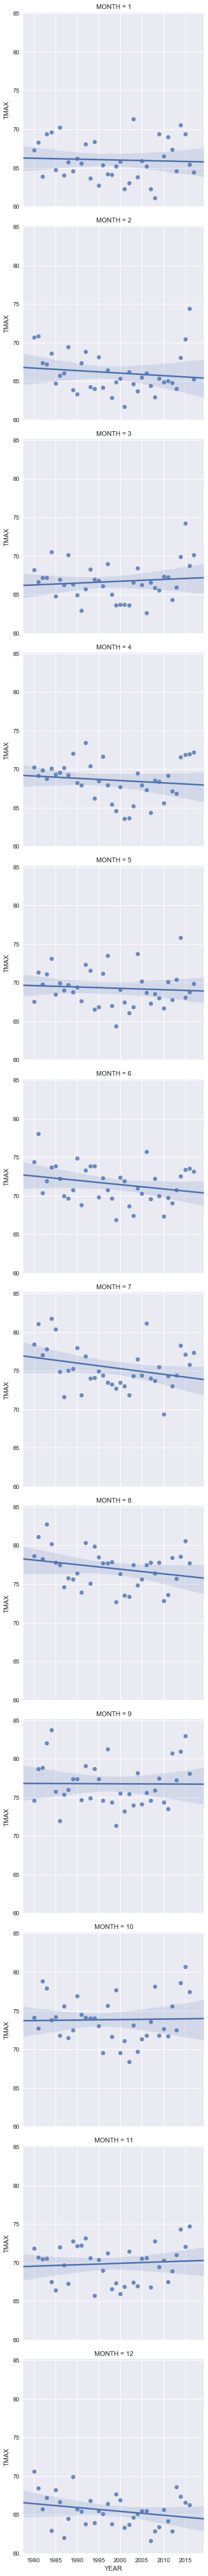

In [362]:
sns.lmplot(x='YEAR',y='TMAX',row='MONTH',data=san_diego)
plt.show()